
The task involves classifying texts based on the presence or absence of offensive language. In this project, I will work with a dataset containing annotated tweets to identify offensive content and develop a machine learning classifier for this purpose. The goal of this activity is to gain practical experience in designing and validating a classifier for offensive language detection.

This notebook is structured into three distinct sections:


1.   Common Codes
2.   Method/model 1 Specific Codes
3.   Method/model 2 Specific Codes


Let's install all **require libraries**.

The first line installs the **"wordcloud"** package, which will be used for creating visualizations of word frequency. The second line installs several other packages that will be used for data analysis and machine learning, including **Pandas, Scikit-learn, Seaborn, and Matplotlib**. The third line installs the **"transformers", "datasets", and "torch"** packages, which are necessary for working with pre-trained language models and deep learning.

Once these packages are installed, you should be ready to start working on the project.

In [ ]:
!pip install wordcloud
!pip install pandas scikit-learn seaborn matplotlib wordcloud
!pip install transformers datasets torch
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.2/224.2 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.3/269.3 kB 27

Let's import all require **libraries**. We will use these further. 

In [ ]:
import pandas as pd
import re
import string
import json
import numpy as np
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

import os
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
import nltk



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, ENGLISH_STOP_WORDS
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from tqdm import tqdm
from keras.callbacks import Callback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, GlobalMaxPooling1D, Dense, Dropout

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


We are going to ignore warning

In [ ]:
import warnings
warnings.filterwarnings('ignore')

Let's set `seed` for all libraries like `torch`, `numpy` etc as my student id

In [ ]:
# set same seeds for all libraries

#numpy seed
np.random.seed(student_id)

# Set Torch seed
torch.manual_seed(student_id)

# Set joblib seed
#joblib.parallel.RandomState(student_id)

# Set Python hash seed
os.environ['PYTHONHASHSEED'] = str(student_id)

# Set matplotlib seed
#plt.seed(student_id)

# Common Codes 

In this section you will write all common codes, for examples


*   Data read
*   Data Splitting
*   Performance Matrics
*   Print Dataset Statistics
*   Saving model and output
*   Loading Model and output
*   etc




**Let's first allow the GDrive access and set data and model paths**

gdrive/MyDrive/Text/../ Your drive 

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
from google.colab import drive
import os

In [ ]:
# lets add all the link for the drive



GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = os.path.join('Drivelink/',str(10)) 
GOOGLE_DRIVE_PATH = os.path.join('gdrive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print('List files: ', os.listdir(GOOGLE_DRIVE_PATH))

train_file = os.path.join(GOOGLE_DRIVE_PATH, 'train.csv')
print('Train file: ', train_file)

val_file = os.path.join(GOOGLE_DRIVE_PATH, 'valid.csv')
print('Validation file: ', val_file)

test_file = os.path.join(GOOGLE_DRIVE_PATH, 'test.csv')
print('Test file: ', test_file)



List files:  ['test.csv', 'valid.csv', 'train.csv', 'models', 'train_25.csv', 'train_75.csv', 'train_50.csv', 'code.ipynb']
Train file:  gdrive/MyDrive/CE807/Assignment2/2200482/train.csv
Validation file:  gdrive/MyDrive/CE807/Assignment2/2200482/valid.csv
Test file:  gdrive/MyDrive/CE807/Assignment2/2200482/test.csv


### Create All training files [100%, 75%, 50%, 25%] 

This code block splits the train_data into different subsets to create datasets of various sizes (25%, 50%, and 75%) by using the train_test_split function from scikit-learn. The splitting is done in a stratified manner, which means that each subset maintains the same proportion of labels as in the original dataset

In [ ]:
# Read the train.csv file
train_data = pd.read_csv(train_file)


##############################

train_75, train_25 = train_test_split(train_data, test_size=0.25, stratify=train_data['label'], random_state=42)
train_50, train_temp = train_test_split(train_75, test_size=1/3, stratify=train_75['label'], random_state=42)
train_temp, train_100 = train_test_split(train_temp, test_size=0.5, stratify=train_temp['label'], random_state=42)

# Print the number of samples in each subset
print(f"Number of samples in 25% subset: {len(train_25)}")
print(f"Number of samples in 50% subset: {len(train_50)}")
print(f"Number of samples in 75% subset: {len(train_75)}")
print(f"Number of samples in 100% subset: {len(train_data)}")


##############################3


train_25.to_csv(os.path.join(GOOGLE_DRIVE_PATH, "train_25.csv"), index=False)
train_50.to_csv(os.path.join(GOOGLE_DRIVE_PATH, "train_50.csv"), index=False)
train_75.to_csv(os.path.join(GOOGLE_DRIVE_PATH, "train_75.csv"), index=False)

print('List files: ', os.listdir(GOOGLE_DRIVE_PATH))

train_file_25 = os.path.join(GOOGLE_DRIVE_PATH, 'train_25.csv')
print('Train file 25 %: ', train_file_25)

train_file_50 = os.path.join(GOOGLE_DRIVE_PATH, 'train_50.csv')
print('Train file 50 %: ', train_file_50)

train_file_75 = os.path.join(GOOGLE_DRIVE_PATH, 'train_75.csv')
print('Train file 75 %: ', train_file_75)

train_file = os.path.join(GOOGLE_DRIVE_PATH, 'train.csv')
print('Train file 100 %: ', train_file)


Number of samples in 25% subset: 3079
Number of samples in 50% subset: 6156
Number of samples in 75% subset: 9234
Number of samples in 100% subset: 12313
List files:  ['test.csv', 'valid.csv', 'train.csv', 'models', 'train_25.csv', 'train_75.csv', 'train_50.csv', 'code.ipynb']
Train file 25 %:  gdrive/MyDrive/CE807/Assignment2/2200482/train_25.csv
Train file 50 %:  gdrive/MyDrive/CE807/Assignment2/2200482/train_50.csv
Train file 75 %:  gdrive/MyDrive/CE807/Assignment2/2200482/train_75.csv
Train file 100 %:  gdrive/MyDrive/CE807/Assignment2/2200482/train.csv


**Print Directory for the both Models**

###MODEL 1

In [ ]:
MODEL_1_DIRECTORY = os.path.join(GOOGLE_DRIVE_PATH, 'models', '1') # Model 1 directory
print('Model 1 directory: ', MODEL_1_DIRECTORY)

MODEL_1_25_DIRECTORY = os.path.join(MODEL_1_DIRECTORY,'25') # Model 1 trained using 25% of train data directory
print('Model 1 directory with 25% data: ', MODEL_1_25_DIRECTORY)

model_1_25_output_test_file = os.path.join(MODEL_1_25_DIRECTORY, 'output_test.csv') # Output file using Model 1 trained using 25% of train data 
print('Output file name using model 1 using 25% of train data: ',model_1_25_output_test_file)

MODEL_1_50_DIRECTORY = os.path.join(MODEL_1_DIRECTORY,'50') # Model 1 trained using 50% of train data directory
print('Model 1 directory with 50% data: ', MODEL_1_50_DIRECTORY)

model_1_50_output_test_file = os.path.join(MODEL_1_50_DIRECTORY, 'output_test.csv') # Output file using Model 1 trained using 50% of train data 
print('Output file name using model 1 using 25% of train data: ',model_1_50_output_test_file)

MODEL_1_75_DIRECTORY = os.path.join(MODEL_1_DIRECTORY,'75') # Model 1 trained using 75% of train data directory
print('Model 1 directory with 75% data: ', MODEL_1_75_DIRECTORY)

model_1_75_output_test_file = os.path.join(MODEL_1_75_DIRECTORY, 'output_test.csv') # Output file using Model 1 trained using 75% of train data 
print('Output file name using model 1 using 75% of train data: ',model_1_75_output_test_file)

MODEL_1_100_DIRECTORY = os.path.join(MODEL_1_DIRECTORY,'100') # Model 1 trained using 100% of train data directory
print('Model 1 directory with 100% data: ', MODEL_1_100_DIRECTORY)

model_1_100_output_test_file = os.path.join(MODEL_1_100_DIRECTORY, 'output_test.csv') # Output file using Model 1 trained using 100% of train data 
print('Output file name using model 1 using 100% of train data: ',model_1_100_output_test_file)



Model 1 directory:  gdrive/MyDrive/CE807/Assignment2/2200482/models/1
Model 1 directory with 25% data:  gdrive/MyDrive/CE807/Assignment2/2200482/models/1/25
Output file name using model 1 using 25% of train data:  gdrive/MyDrive/CE807/Assignment2/2200482/models/1/25/output_test.csv
Model 1 directory with 50% data:  gdrive/MyDrive/CE807/Assignment2/2200482/models/1/50
Output file name using model 1 using 25% of train data:  gdrive/MyDrive/CE807/Assignment2/2200482/models/1/50/output_test.csv
Model 1 directory with 75% data:  gdrive/MyDrive/CE807/Assignment2/2200482/models/1/75
Output file name using model 1 using 75% of train data:  gdrive/MyDrive/CE807/Assignment2/2200482/models/1/75/output_test.csv
Model 1 directory with 100% data:  gdrive/MyDrive/CE807/Assignment2/2200482/models/1/100
Output file name using model 1 using 100% of train data:  gdrive/MyDrive/CE807/Assignment2/2200482/models/1/100/output_test.csv


### MODEL 2

In [ ]:
MODEL_2_DIRECTORY = os.path.join(GOOGLE_DRIVE_PATH, 'models', '2') # Model 2 directory
print('Model 2 directory: ', MODEL_2_DIRECTORY)

MODEL_2_25_DIRECTORY = os.path.join(MODEL_2_DIRECTORY,'25') # Model 2 trained using 25% of train data directory
print('Model 2 directory with 25% data: ', MODEL_2_25_DIRECTORY)

model_2_25_output_test_file = os.path.join(MODEL_2_25_DIRECTORY, 'output_test.csv') # Output file using Model 2 trained using 25% of train data 
print('Output file name using model 2 using 25% of train data: ',model_2_25_output_test_file)

MODEL_2_50_DIRECTORY = os.path.join(MODEL_2_DIRECTORY,'50') # Model 2 trained using 50% of train data directory
print('Model 2 directory with 50% data: ', MODEL_2_50_DIRECTORY)

model_2_50_output_test_file = os.path.join(MODEL_2_50_DIRECTORY, 'output_test.csv') # Output file using Model 2 trained using 25% of train data 
print('Output file name using model 2 using 25% of train data: ',model_2_50_output_test_file)

MODEL_2_75_DIRECTORY = os.path.join(MODEL_2_DIRECTORY,'75') # Model 2 trained using 75% of train data directory
print('Model 2 directory with 75% data: ', MODEL_2_75_DIRECTORY)

model_2_75_output_test_file = os.path.join(MODEL_2_75_DIRECTORY, 'output_test.csv') # Output file using Model 2 trained using 25% of train data 
print('Output file name using model 2 using 75% of train data: ',model_2_75_output_test_file)

MODEL_2_100_DIRECTORY = os.path.join(MODEL_2_DIRECTORY,'100') # Model 2 trained using 75% of train data directory
print('Model 2 directory with 100% data: ', MODEL_2_100_DIRECTORY)

model_2_100_output_test_file = os.path.join(MODEL_2_100_DIRECTORY, 'output_test.csv') # Output file using Model 2 trained using 25% of train data 
print('Output file name using model 2 using 100% of train data: ',model_2_100_output_test_file)



Model 2 directory:  gdrive/MyDrive/CE807/Assignment2/2200482/models/2
Model 2 directory with 25% data:  gdrive/MyDrive/CE807/Assignment2/2200482/models/2/25
Output file name using model 2 using 25% of train data:  gdrive/MyDrive/CE807/Assignment2/2200482/models/2/25/output_test.csv
Model 2 directory with 50% data:  gdrive/MyDrive/CE807/Assignment2/2200482/models/2/50
Output file name using model 2 using 25% of train data:  gdrive/MyDrive/CE807/Assignment2/2200482/models/2/50/output_test.csv
Model 2 directory with 75% data:  gdrive/MyDrive/CE807/Assignment2/2200482/models/2/75
Output file name using model 2 using 75% of train data:  gdrive/MyDrive/CE807/Assignment2/2200482/models/2/75/output_test.csv
Model 2 directory with 100% data:  gdrive/MyDrive/CE807/Assignment2/2200482/models/2/100
Output file name using model 2 using 100% of train data:  gdrive/MyDrive/CE807/Assignment2/2200482/models/2/100/output_test.csv


**Print Dataset Statistics**

In [ ]:
train_data = pd.read_csv(train_file)
train_data_25 = pd.read_csv(train_file_25)
train_data_50 = pd.read_csv(train_file_50)
train_data_75 = pd.read_csv(train_file_75)

**Training Data Statistics [100 %]**

In [ ]:
# Print the first few rows of the dataframes
train_data.head()

,id,tweet,label
0,42884,@USER I’m done with you as well. An INTENTIONA...,NOT
1,92152,I now have over 6k followers. Only 94k to go ...,NOT
2,65475,@USER Tom was bought! He is more interested in...,NOT
3,22144,@USER @USER Even her brother thinks she is a m...,OFF
4,81048,@USER @USER @USER @USER @USER I can understand...,OFF


Shape of train_data [100%]: (12313, 3)
Label distribution for train_data:
NOT    8221
OFF    4092
Name: label, dtype: int64


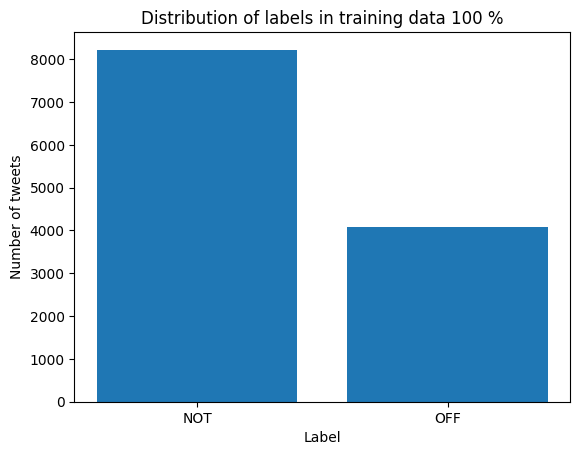

In [ ]:

# Print the shape of the dataframes
print("Shape of train_data [100%]:", train_data.shape)


# Print the label distribution for train_data
print("Label distribution for train_data:")
print(train_data['label'].value_counts())

# Calculate label distribution
label_counts = train_data['label'].value_counts()

# Plot label distribution using a bar plot
plt.bar(label_counts.index, label_counts.values)

# Add labels and title
plt.xlabel("Label")
plt.ylabel("Number of tweets")
plt.title("Distribution of labels in training data 100 %")

# Display the plot
plt.show()



**Training Data Statistics [75 %]**

In [ ]:
# Print the first few rows of the dataframes
train_data_75.head()

,id,tweet,label
0,90041,@USER @USER Billy you have a short memory. Oba...,NOT
1,80698,@USER He just doesn’t fit the team now. Agholo...,OFF
2,95238,#TwitterShouldBe a place where everyone can ha...,NOT
3,99400,@USER Hope he is enjoying himself while he can🤣,OFF
4,11356,@USER @USER @USER would help them but he is in...,OFF


Shape of train_data_75: (9234, 3)
Label distribution for train_data_75:
NOT    6165
OFF    3069
Name: label, dtype: int64


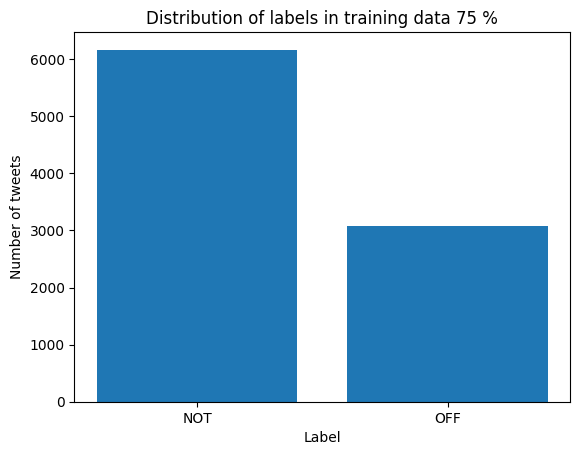

In [ ]:

# Print the shape of the dataframes
print("Shape of train_data_75:", train_data_75.shape)


# Print the label distribution for train_data_75
print("Label distribution for train_data_75:")
print(train_data_75['label'].value_counts())

# Calculate label distribution
label_counts = train_data_75['label'].value_counts()

# Plot label distribution using a bar plot
plt.bar(label_counts.index, label_counts.values)

# Add labels and title
plt.xlabel("Label")
plt.ylabel("Number of tweets")
plt.title("Distribution of labels in training data 75 %")

# Display the plot
plt.show()



**Training Data Statistics [50 %]**

In [ ]:
# Print the first few rows of the dataframes
train_data_50.head()

,id,tweet,label
0,25021,"@USER @USER I disagree. See Antifa.""""",NOT
1,43750,@USER @USER He is part of the problem in the I...,NOT
2,17615,@USER Guilt by association i see. A great tact...,NOT
3,10455,@USER Smearing Supreme Court Justices now? W...,NOT
4,45057,@USER He is still one of my favorites URL,NOT


Shape of train_data_50: (6156, 3)
Label distribution for train_data_50:
NOT    4110
OFF    2046
Name: label, dtype: int64


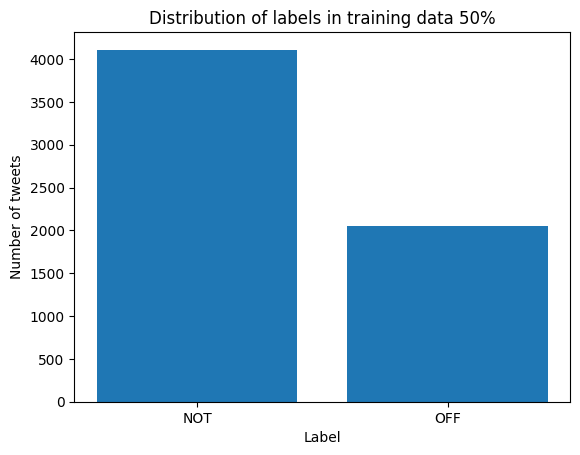

In [ ]:

# Print the shape of the dataframes
print("Shape of train_data_50:", train_data_50.shape)


# Print the label distribution for train_data_50
print("Label distribution for train_data_50:")
print(train_data_50['label'].value_counts())

# Calculate label distribution
label_counts = train_data_50['label'].value_counts()

# Plot label distribution using a bar plot
plt.bar(label_counts.index, label_counts.values)

# Add labels and title
plt.xlabel("Label")
plt.ylabel("Number of tweets")
plt.title("Distribution of labels in training data 50%")

# Display the plot
plt.show()



**Training Data Statistics [25 %]**

In [ ]:
# Print the first few rows of the dataframes
train_data_25.head()

,id,tweet,label
0,24188,@USER @USER Show me a GOP/Trump supporter mass...,OFF
1,54521,@USER Would our country be able to keep its la...,NOT
2,70482,@USER @USER 😂😂😂😂 thanks for the history lesson...,NOT
3,51894,@USER I won’t even start Naruto cause it’s jus...,NOT
4,65821,@USER @USER It's almost comical at this point,NOT


Shape of train_data_25: (3079, 3)
Label distribution for train_data_25:
NOT    2056
OFF    1023
Name: label, dtype: int64


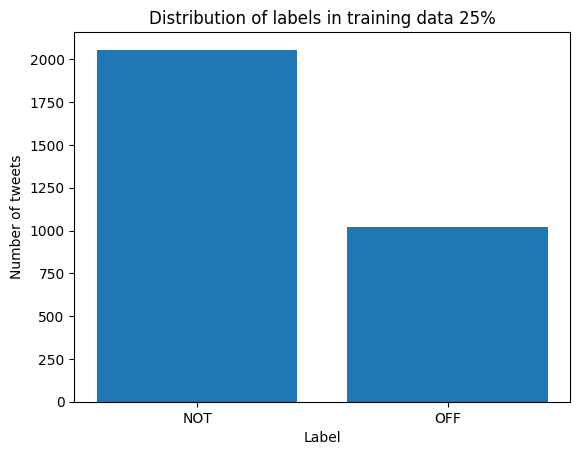

In [ ]:

# Print the shape of the dataframes
print("Shape of train_data_25:", train_data_25.shape)


# Print the label distribution for train_data_25
print("Label distribution for train_data_25:")
print(train_data_25['label'].value_counts())

# Calculate label distribution
label_counts = train_data_25['label'].value_counts()

# Plot label distribution using a bar plot
plt.bar(label_counts.index, label_counts.values)

# Add labels and title
plt.xlabel("Label")
plt.ylabel("Number of tweets")
plt.title("Distribution of labels in training data 25%")

# Display the plot
plt.show()



**Validation Data Statistics**

In [ ]:
val_data = pd.read_csv(val_file)

In [ ]:
# Print the first few rows of the dataframes
val_data.head()

,id,tweet,label
0,12476,@USER @USER @USER Trump is declassifying infor...,NOT
1,23242,@USER Ha even with them trying to rig the syst...,NOT
2,97885,@USER @USER @USER Man you really thought this ...,NOT
3,43414,@USER Ms. Clinton - you are a class act. My re...,OFF
4,81403,@USER It’s still here at 753. If someone did t...,NOT


Shape of val_data: (927, 3)
Label distribution for val_data:
NOT    619
OFF    308
Name: label, dtype: int64


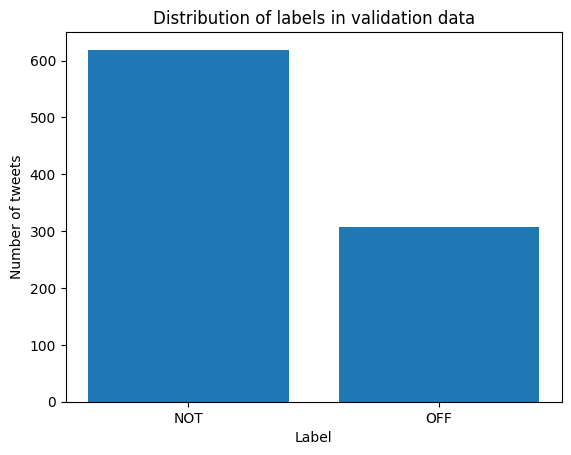

In [ ]:

# Print the shape of the dataframes
print("Shape of val_data:", val_data.shape)


# Print the label distribution for val_data
print("Label distribution for val_data:")
print(val_data['label'].value_counts())

# Calculate label distribution
label_counts = val_data['label'].value_counts()

# Plot label distribution using a bar plot
plt.bar(label_counts.index, label_counts.values)

# Add labels and title
plt.xlabel("Label")
plt.ylabel("Number of tweets")
plt.title("Distribution of labels in validation data")

# Display the plot
plt.show()



**Test Data Statistics**

In [ ]:
test_data = pd.read_csv(test_file)

In [ ]:
# Print the first few rows of the dataframes
test_data.head()

,id,tweet,label
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,OFF
1,27014,"#ConstitutionDay is revered by Conservatives, ...",NOT
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,NOT
3,13876,#Watching #Boomer getting the news that she is...,NOT
4,60133,#NoPasaran: Unity demo to oppose the far-right...,OFF


Shape of test_data: (860, 3)
Label distribution for test_data:
NOT    620
OFF    240
Name: label, dtype: int64


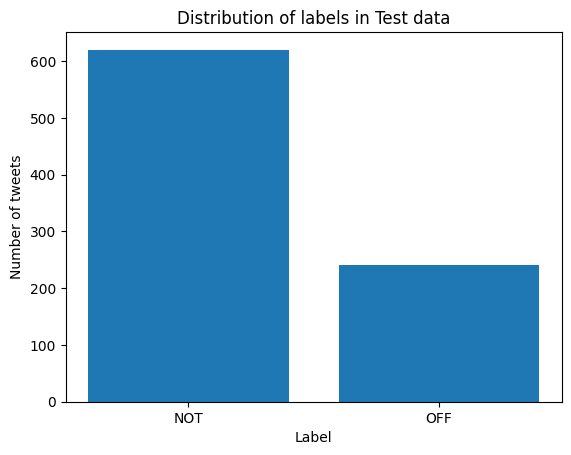

In [ ]:

# Print the shape of the dataframes
print("Shape of test_data:", test_data.shape)


# Print the label distribution for test_data
print("Label distribution for test_data:")
print(test_data['label'].value_counts())

# Calculate label distribution
label_counts = test_data['label'].value_counts()

# Plot label distribution using a bar plot
plt.bar(label_counts.index, label_counts.values)

# Add labels and title
plt.xlabel("Label")
plt.ylabel("Number of tweets")
plt.title("Distribution of labels in Test data")

# Display the plot
plt.show()



**Tweet Length distrubution within data**

In [ ]:
datasets = {
    "Train": train_data,
    "Validation": val_data,
    "Test": test_data
}

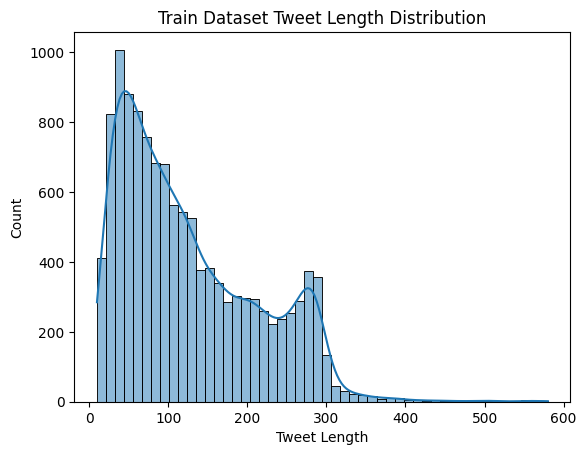

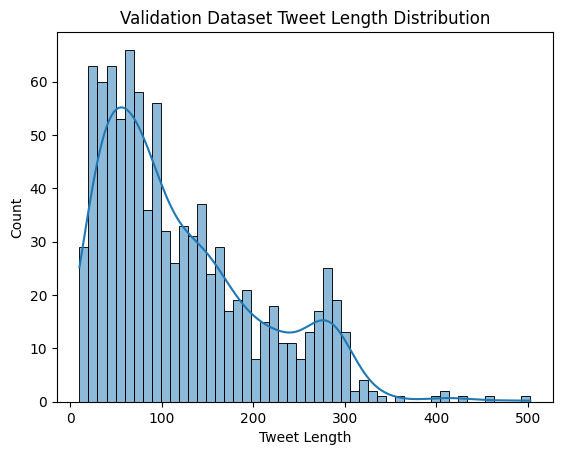

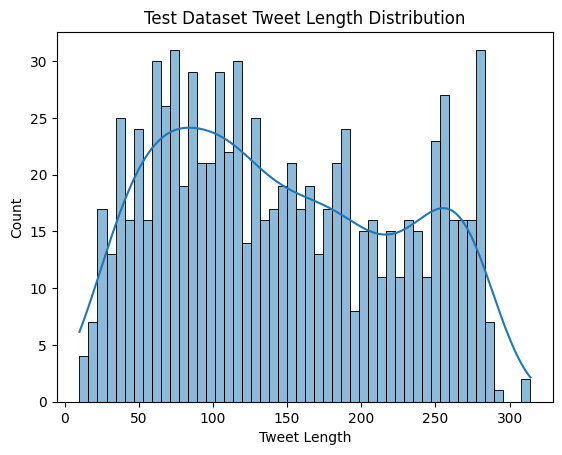

In [ ]:
# 1. Analyze tweet lengths
for name, data in datasets.items():
    data['tweet_length'] = data['tweet'].apply(lambda x: len(x))
    plt.figure()
    sns.histplot(data=data, x="tweet_length", bins=50, kde=True)
    plt.title(f"{name} Dataset Tweet Length Distribution")
    plt.xlabel("Tweet Length")
    plt.ylabel("Count")
    plt.show()



In [ ]:
# Analyze most common words
def get_most_common_words(tweets, n=10):
    word_count = {}
    for text in tweets:
        for word in text.split():
            word_count[word] = word_count.get(word, 0) + 1
    return sorted(word_count.items(), key=lambda x: x[1], reverse=True)[:n]


**Preprocessign of Text (tweet)**

In [ ]:
def preprocess_text(tweet):
    # Convert tweet to lowercase
    tweet = tweet.lower()
    
    # Remove URLs
    tweet = re.sub(r"http\S+|www\S+|https\S+", "", tweet, flags=re.MULTILINE)
    
     # Remove mention / username
    tweet = re.sub(r"\@\w+|\#", "", tweet)
     
    # Tokenization
    tokens = tweet.split()
    
    # Remove stop words
    tokens = [token for token in tokens if token not in ENGLISH_STOP_WORDS]
    
    # Join tokens back into a single string
    tweet = " ".join(tokens)
    
    return tweet

Preprocess the all tweets avialble in our datasets

In [ ]:
# Pre-process dataset
train_data['tweet'] = train_data['tweet'].apply(preprocess_text)
train_data_75['tweet'] = train_data_75['tweet'].apply(preprocess_text)
train_data_50['tweet'] = train_data_50['tweet'].apply(preprocess_text)
train_data_25['tweet'] = train_data_25['tweet'].apply(preprocess_text)

val_data['tweet'] = val_data['tweet'].apply(preprocess_text)
test_data['tweet'] = test_data['tweet'].apply(preprocess_text)

In [ ]:
#ignore

X_train = train_data['tweet']
y_train = train_data['label']

X_val = val_data['tweet']
y_val = val_data['label']


**Computer Performance**

Different performance metrics such as accuracy, recall, precision, F1 score, and confusion matrix are being used to evaluate the machine learning model for identifying offensive content in tweets. All metrics will be printed, and the confusion matrix will be displayed with proper axis labels to identify the model's performance in detail.

In [ ]:
def compute_performance(y_val, y_pred):
  print("compute_performance")

  # Calculate performance metrics
  accuracy = accuracy_score(y_val, y_pred)
  f1_macro = f1_score(y_val, y_pred, average='macro')
  f1 = f1_score(y_val, y_pred, average='weighted')


  print("\ndataset accuracy: ", accuracy)
  print("\ndataset set F1 Score: ", f1)
  print('\nConfusion Matrix:',confusion_matrix(y_val, y_pred))
  print("\ndataset classification report:\n", classification_report(y_val, y_pred))


  # Create a list of unique labels in the dataset
  unique_labels = sorted(set(y_val))
  # Display confusion matrix
  conf_mat = confusion_matrix(y_val, y_pred)
  sns.heatmap(conf_mat, annot=True, fmt="d", cmap="coolwarm",
            xticklabels=unique_labels, yticklabels=unique_labels)
  plt.xlabel("Predicted")
  plt.ylabel("True")
  plt.title("Confusion Matrix")
  plt.show()
  return f1, accuracy

# Method 1 Start



## Training Method 1 Code



The function takes in training data X_train and labels y_train. It first initializes to perform a hyperparameter search for the best combination for the SVC() and RF classifier.

Finally, the best estimator (i.e., the SVC() classifier with the best hyperparameters) is returned as the output of the function.

## RF and SV use to find best parametrs for Stacking

## Random Forest



train_model1_1 is used to find out the performance of the random forest and train_model1_bestParametrs use to findout the best parameters from the GridSearchCV for Random Forest

In [ ]:
# best parameters finder for random forest
def train_model1_bestParametrs(X_train, y_train):
    print("train_model1 ...............")

    print('Let\'s start training RandomForestClassifier')
    # Create a RandomForestClassifier
    rf = RandomForestClassifier(random_state=42)

    # Define the parameter grid for the RandomForestClassifier
    param_grid = {
        'n_estimators': [10, 50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }

    # Create the GridSearchCV object with the RandomForestClassifier and the parameter grid
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

    # Fit the GridSearchCV object to the training data
    grid_search.fit(X_train, y_train)

    # Get the best parameters from the GridSearchCV
    best_params = grid_search.best_params_

    print("Best parameters found: ", best_params)

    # Train the RandomForestClassifier with the best parameters on the entire training set
    best_rf = RandomForestClassifier(**best_params, random_state=42)
    best_rf.fit(X_train, y_train)

    return best_rf


In [ ]:
def train_model1_1(X_train, y_train):
    print("train_model1 ...............")

    print('Let\'s start training RandomForestClassifier with the best parameters')

    # Train the RandomForestClassifier with the best parameters
    best_rf = RandomForestClassifier(bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=42)
    #best_rf = RandomForestClassifier(n_estimators=100, random_state=42) # initial baseline model
    
    best_rf.fit(X_train, y_train)

    return best_rf

## Support Vector



train_model1_2 is used to find out the performance of the random forest and train_svm_model_bestParametrs use to findout the best parameters from the GridSearchCV for Random Forest

In [ ]:


def train_model1_2(X_train, y_train):
    print("train_svm_model ...............")

    print('Let\'s start training Support Vector Machine with the best parameters')
   
    # Get the best parameters found using train_svm_model_bestParametrs
    best_params = {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
    
    # Train the Support Vector Machine with the provided best parameters
    best_svm = SVC(**best_params, random_state=42)
    
    best_svm.fit(X_train, y_train)

    return best_svm

In [ ]:
def train_svm_model_bestParametrs(X_train, y_train):
    print("train_svm_model ...............")

    print('Let\'s start training Support Vector Machine')
    
    # Create a Support Vector Machine
    svm = SVC(random_state=42)

    # Define the parameter grid for the Support Vector Machine
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto'],
        'degree': [2, 3, 4, 5] # Only for 'poly' kernel
    }

    # Create the GridSearchCV object with the Support Vector Machine and the parameter grid
    grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

    # Fit the GridSearchCV object to the training data
    grid_search.fit(X_train, y_train)

    # Get the best parameters from the GridSearchCV
    best_params = grid_search.best_params_

    print("Best parameters found: ", best_params)

    # Train the Support Vector Machine with the best parameters on the entire training set
    best_svm = SVC(**best_params, random_state=42)
    best_svm.fit(X_train, y_train)

    return best_svm

This function 'save_model1' save our model and vectorizer in driecrtory So that we can use it further for testing

In [ ]:
def save_model1(model, count_vectorizer, directory):
    print("save_model1")
    # Create the directory if not available
    os.makedirs(directory, exist_ok=True)
    # Save the model to the directory
    model_file = os.path.join(directory, 'best_model.pkl')
    with open(model_file, 'wb') as f:
        pickle.dump(model, f)

    # Save the vectorizer to the directory
    vectorizer_file = os.path.join(directory, 'count_vectorizer.pkl')
    with open(vectorizer_file, 'wb') as f:
        pickle.dump(count_vectorizer, f)
    
    return model_file


## Stacking Classifier(Random Forest & Support Vector)


This is the Meothod 1 utilized the combination of both SVM and RF

In [ ]:
def train_model1(X_train, y_train):
    print("train_stacking_model ...............")

    # Define the base classifiers
    base_classifiers = [
        ('svm', SVC(C=1.0, degree=2, kernel='linear', gamma='scale')),# SVM best parameters after finding from gird search
        ('random_forest', RandomForestClassifier(bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=42)),
        # RF best parameters after finding from gird search
    ]

    # Create the stacking classifier using the base classifiers and an SVM as the meta-classifier
    stacking_classifier = StackingClassifier(estimators=base_classifiers, final_estimator=SVC(C=1.0, kernel='linear', gamma='scale'))

    # Train the stacking classifier on the training data
    stacking_classifier.fit(X_train, y_train)

    return stacking_classifier

In [ ]:
def train_method1(train_file, val_file, model_dir):


  """
     Takes train_file, val_file and model_dir as input.
     It trained on the train_file datapoints, and validate on the val_file datapoints.
     While training and validating, it print different evaluataion metrics and losses, wheverever necessary.
     After finishing the training, it saved the best model in the model_dir.

     ADD Other arguments, if needed.

    Args:
        train_file: Train file name
        val_file: Validation file name
        model_dir: Model output Directory
            
    """

  print("\ntrain_method1 ..................")

  print("\ntrain_method1 Reading data ..................")
  train_data = pd.read_csv(train_file)
  val_data = pd.read_csv(val_file)
  
  print("\ntrain_method1 Apply Preprocessing ..................")
  train_data['tweet'] = train_data['tweet'].apply(preprocess_text)
  val_data['tweet'] = val_data['tweet'].apply(preprocess_text)


  X_train = train_data['tweet']
  y_train = train_data['label']

  X_val = val_data['tweet']
  y_val = val_data['label']



  # Transform the text data using TfidfVectorizer
  tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
  X_train = tfidf_vectorizer.fit_transform(X_train)
  X_val = tfidf_vectorizer.transform(X_val)

  

  # train our model
  
  model = train_model1(X_train, y_train)
  print("\nTraining Sucessfully [train_model1] ")
  model_file_path = save_model1(model,tfidf_vectorizer, model_dir)
  print("\nSave Sucessfully [save_model1] ")


  print("\nTraining data Performance")
  train_f1_score, train_accuracy = compute_performance(y_train, model.predict(X_train))
  #print("\nTraining data F1 ScoreF1 : ", train_f1_score)
  #print("\nTraining data accuracy: ", train_accuracy)

  print("\nValidation data Performance")
  validation_f1_score,validation_accuracy  = compute_performance(y_val, model.predict(X_val))
  #print("\nValidation data F1 Score : ", validation_f1_score)
  #print("\nValidation data accuracy: ", validation_accuracy)


  return model_file_path

**Save model [Train using of 100% of data] in the MODEL_1_100_DIRECTORY** 

Train using of 100% of data
Train file directory 100 %:  gdrive/MyDrive/CE807/Assignment2/2200482/train.csv
Validation file directory :  gdrive/MyDrive/CE807/Assignment2/2200482/valid.csv

train_method1 ..................

train_method1 Reading data ..................

train_method1 Apply Preprocessing ..................
train_stacking_model ...............

Training Sucessfully [train_model1] 
save_model1

Save Sucessfully [save_model1] 

Training data Performance
compute_performance

dataset accuracy:  0.8677008040282628

dataset set F1 Score:  0.8620694883986916

Confusion Matrix: [[7922  299]
 [1330 2762]]

dataset classification report:
               precision    recall  f1-score   support

         NOT       0.86      0.96      0.91      8221
         OFF       0.90      0.67      0.77      4092

    accuracy                           0.87     12313
   macro avg       0.88      0.82      0.84     12313
weighted avg       0.87      0.87      0.86     12313



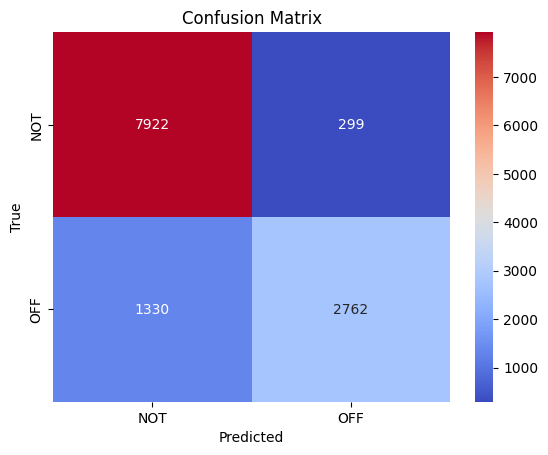


Validation data Performance
compute_performance

dataset accuracy:  0.785329018338727

dataset set F1 Score:  0.7720224899413395

Confusion Matrix: [[571  48]
 [151 157]]

dataset classification report:
               precision    recall  f1-score   support

         NOT       0.79      0.92      0.85       619
         OFF       0.77      0.51      0.61       308

    accuracy                           0.79       927
   macro avg       0.78      0.72      0.73       927
weighted avg       0.78      0.79      0.77       927



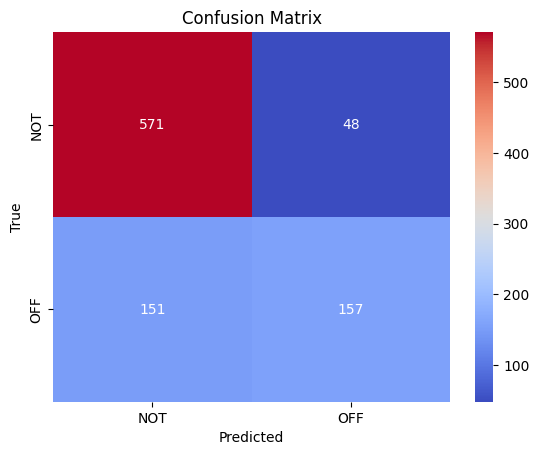

Model 1 directory with 100% data:  gdrive/MyDrive/CE807/Assignment2/2200482/models/1/100
Model 1 save with 100% data:  gdrive/MyDrive/CE807/Assignment2/2200482/models/1/100/best_model.pkl


In [ ]:
print('Train using of 100% of data')
print('Train file directory 100 %: ', train_file)
print('Validation file directory : ', val_file)
model_100_file = train_method1(train_file, val_file, MODEL_1_100_DIRECTORY)
print('Model 1 directory with 100% data: ', MODEL_1_100_DIRECTORY)
print('Model 1 save with 100% data: ', model_100_file)

**Save model [Train using of 75% of data] in the MODEL_1_75_DIRECTORY** 

Train using of 75% of data
Train file 75 %:  gdrive/MyDrive/CE807/Assignment2/2200482/train_75.csv
Validation file :  gdrive/MyDrive/CE807/Assignment2/2200482/valid.csv
Model 1 directory with 75% data:  gdrive/MyDrive/CE807/Assignment2/2200482/models/1/75

train_method1 ..................

train_method1 Reading data ..................

train_method1 Apply Preprocessing ..................
train_stacking_model ...............

Training Sucessfully [train_model1] 
save_model1

Save Sucessfully [save_model1] 

Training data Performance
compute_performance

dataset accuracy:  0.8780593458956032

dataset set F1 Score:  0.8728456149347749

Confusion Matrix: [[5990  175]
 [ 951 2118]]

dataset classification report:
               precision    recall  f1-score   support

         NOT       0.86      0.97      0.91      6165
         OFF       0.92      0.69      0.79      3069

    accuracy                           0.88      9234
   macro avg       0.89      0.83      0.85      9234
weighted 

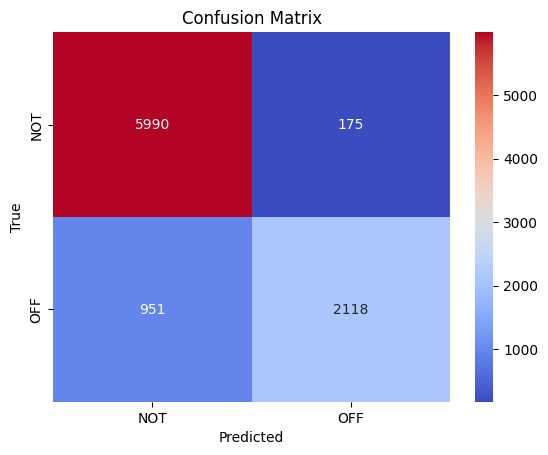


Validation data Performance
compute_performance

dataset accuracy:  0.7756202804746494

dataset set F1 Score:  0.7592037719554032

Confusion Matrix: [[573  46]
 [162 146]]

dataset classification report:
               precision    recall  f1-score   support

         NOT       0.78      0.93      0.85       619
         OFF       0.76      0.47      0.58       308

    accuracy                           0.78       927
   macro avg       0.77      0.70      0.72       927
weighted avg       0.77      0.78      0.76       927



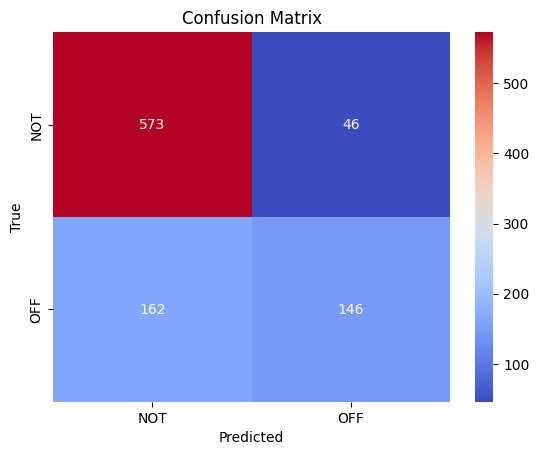

Model 1 save with 75% data:  gdrive/MyDrive/CE807/Assignment2/2200482/models/1/75/best_model.pkl


In [ ]:
print('Train using of 75% of data')
print('Train file 75 %: ', train_file_75)
print('Validation file : ', val_file)
print('Model 1 directory with 75% data: ', MODEL_1_75_DIRECTORY)
model_75_file = train_method1(train_file_75, val_file, MODEL_1_75_DIRECTORY)
print('Model 1 save with 75% data: ', model_75_file)

**Save model [Train using of 50% of data] in the MODEL_1_50_DIRECTORY** 

Train using of 50% of data
Train file 50 %:  gdrive/MyDrive/CE807/Assignment2/2200482/train_50.csv
Validation file :  gdrive/MyDrive/CE807/Assignment2/2200482/valid.csv
Model 1 directory with 50% data:  gdrive/MyDrive/CE807/Assignment2/2200482/models/1/50

train_method1 ..................

train_method1 Reading data ..................

train_method1 Apply Preprocessing ..................
train_stacking_model ...............

Training Sucessfully [train_model1] 
save_model1

Save Sucessfully [save_model1] 

Training data Performance
compute_performance

dataset accuracy:  0.8841780376868096

dataset set F1 Score:  0.8791311998614176

Confusion Matrix: [[4016   94]
 [ 619 1427]]

dataset classification report:
               precision    recall  f1-score   support

         NOT       0.87      0.98      0.92      4110
         OFF       0.94      0.70      0.80      2046

    accuracy                           0.88      6156
   macro avg       0.90      0.84      0.86      6156
weighted 

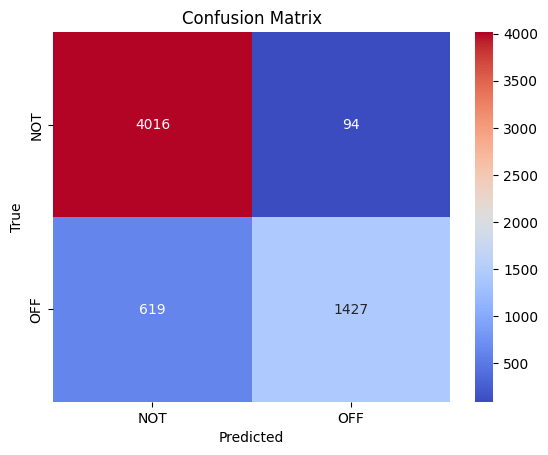


Validation data Performance
compute_performance

dataset accuracy:  0.7702265372168284

dataset set F1 Score:  0.7532092762412537

Confusion Matrix: [[571  48]
 [165 143]]

dataset classification report:
               precision    recall  f1-score   support

         NOT       0.78      0.92      0.84       619
         OFF       0.75      0.46      0.57       308

    accuracy                           0.77       927
   macro avg       0.76      0.69      0.71       927
weighted avg       0.77      0.77      0.75       927



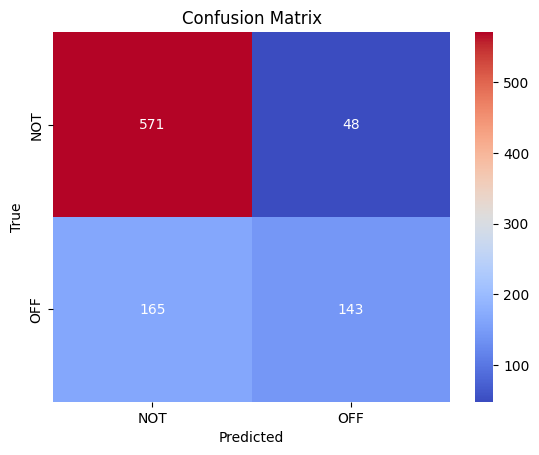

Model 1 save with 50% data:  gdrive/MyDrive/CE807/Assignment2/2200482/models/1/50/best_model.pkl


In [ ]:
print('Train using of 50% of data')
print('Train file 50 %: ', train_file_50)
print('Validation file : ', val_file)
print('Model 1 directory with 50% data: ', MODEL_1_50_DIRECTORY)
model_50_file = train_method1(train_file_50, val_file, MODEL_1_50_DIRECTORY)
print('Model 1 save with 50% data: ', model_50_file)

**Save model [Train using of 25% of data] in the MODEL_1_25_DIRECTORY** 

Train using of 25% of data
Train file 25 %:  gdrive/MyDrive/CE807/Assignment2/2200482/train_25.csv
Validation file :  gdrive/MyDrive/CE807/Assignment2/2200482/valid.csv
Model 1 directory with 25% data:  gdrive/MyDrive/CE807/Assignment2/2200482/models/1/25

train_method1 ..................

train_method1 Reading data ..................

train_method1 Apply Preprocessing ..................
train_stacking_model ...............

Training Sucessfully [train_model1] 
save_model1

Save Sucessfully [save_model1] 

Training data Performance
compute_performance

dataset accuracy:  0.9009418642416369

dataset set F1 Score:  0.8968238570322247

Confusion Matrix: [[2030   26]
 [ 279  744]]

dataset classification report:
               precision    recall  f1-score   support

         NOT       0.88      0.99      0.93      2056
         OFF       0.97      0.73      0.83      1023

    accuracy                           0.90      3079
   macro avg       0.92      0.86      0.88      3079
weighted 

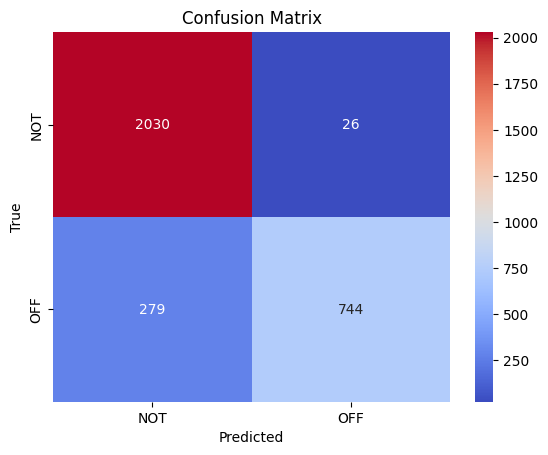


Validation data Performance
compute_performance

dataset accuracy:  0.7572815533980582

dataset set F1 Score:  0.7346630870801372

Confusion Matrix: [[575  44]
 [181 127]]

dataset classification report:
               precision    recall  f1-score   support

         NOT       0.76      0.93      0.84       619
         OFF       0.74      0.41      0.53       308

    accuracy                           0.76       927
   macro avg       0.75      0.67      0.68       927
weighted avg       0.75      0.76      0.73       927



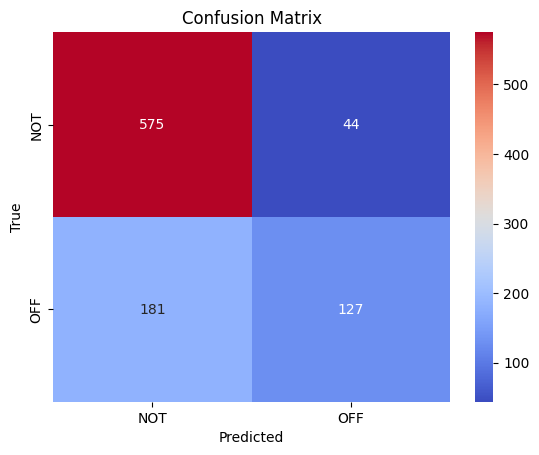

Model 1 save with 25% data:  gdrive/MyDrive/CE807/Assignment2/2200482/models/1/25/best_model.pkl


In [ ]:
print('Train using of 25% of data')
print('Train file 25 %: ', train_file_25)
print('Validation file : ', val_file)
print('Model 1 directory with 25% data: ', MODEL_1_25_DIRECTORY)
model_25_file = train_method1(train_file_25, val_file, MODEL_1_25_DIRECTORY)
print('Model 1 save with 25% data: ', model_25_file)

## Testing Method 1 Code
 test_method1 that take `test_file`, `model_file` and `output_dir` as input. Further compute all the performece metrics

load_model1 load the model and counter vectorzer from the directory

In [ ]:
def load_model1(directory):
    print("load_model1")

    # Load the model from the directory
    model_file = os.path.join(directory, 'best_model.pkl')
    with open(model_file, 'rb') as f:
        loaded_model = pickle.load(f)

    # Load the count_vectorizer from the directory
    vectorizer_file = os.path.join(directory, 'count_vectorizer.pkl')
    with open(vectorizer_file, 'rb') as f:
        loaded_vectorizer = pickle.load(f)

    return loaded_model, loaded_vectorizer


In [ ]:
def test_method1(test_file, model_file, output_dir):


  """
     take test_file, model_file and output_dir as input.
     It loads model and test of the examples in the test_file.
     It prints different evaluation metrics, and saves the output in output directory

     ADD Other arguments, if needed

    Args:
        test_file: test file name
        model_file: model file name
        output_dir: Output Directory
    """

  test_data = pd.read_csv(test_file)

  
  test_data_out = test_data
  
  test_data['tweet'] = test_data['tweet'].apply(preprocess_text)

  X_test = test_data['tweet']
  y_test = test_data['label']

  model,count_vectorizer = load_model1(output_dir)

  X_test = count_vectorizer.transform(X_test)

  y_test_pred = model.predict(X_test)
  print("\nTest data Performance")
  test_f1_score, test_accuracy = compute_performance(y_test, y_test_pred)
  print("\nTest data F1 Score  ", test_f1_score)
  print("\nTest data accuracy: ", test_accuracy) 

  # Add the model's output as a new column to the test data
  test_data_out['out_label'] = y_test_pred


  # Save the test data with the new predictions column in the required format

  out_file = os.path.join(output_dir, 'output_test.csv')
  print('Saving model [sucessfully] output to', out_file)
  test_data_out.to_csv(out_file, index=False)
  
  return test_accuracy

**[ Test the performance of a model that has been trained on 100% ]** 

Testing using model trained on 100% data
Test test_file gdrive/MyDrive/CE807/Assignment2/2200482/test.csv
Test model_100_file:  gdrive/MyDrive/CE807/Assignment2/2200482/models/1/100/best_model.pkl
Test MODEL_1_100_DIRECTORY:  gdrive/MyDrive/CE807/Assignment2/2200482/models/1/100
load_model1

Test data Performance
compute_performance

dataset accuracy:  0.8325581395348837

dataset set F1 Score:  0.8176437822030359

Confusion Matrix: [[596  24]
 [120 120]]

dataset classification report:
               precision    recall  f1-score   support

         NOT       0.83      0.96      0.89       620
         OFF       0.83      0.50      0.62       240

    accuracy                           0.83       860
   macro avg       0.83      0.73      0.76       860
weighted avg       0.83      0.83      0.82       860



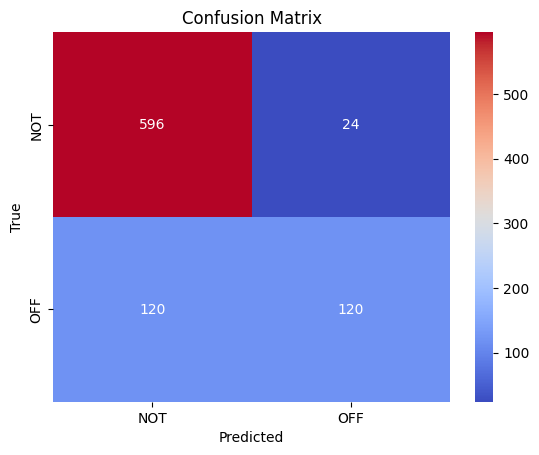


Test data F1 Score   0.8176437822030359

Test data accuracy:  0.8325581395348837
Saving model [sucessfully] output to gdrive/MyDrive/CE807/Assignment2/2200482/models/1/100/output_test.csv


In [ ]:
print('Testing using model trained on 100% data')

print('Test test_file' , test_file)
print('Test model_100_file: ', model_100_file)
print('Test MODEL_1_100_DIRECTORY: ', MODEL_1_100_DIRECTORY)

model_100_accuracy = test_method1(test_file, model_100_file, MODEL_1_100_DIRECTORY)

**[ Test the performance of a model that has been trained on 75% ]** 

Testing using model trained on 75% data
Test test_file gdrive/MyDrive/CE807/Assignment2/2200482/test.csv
Test model_75_file:  gdrive/MyDrive/CE807/Assignment2/2200482/models/1/75/best_model.pkl
Test MODEL_1_75_DIRECTORY:  gdrive/MyDrive/CE807/Assignment2/2200482/models/1/75
load_model1

Test data Performance
compute_performance

dataset accuracy:  0.8267441860465117

dataset set F1 Score:  0.8062918182087286

Confusion Matrix: [[604  16]
 [133 107]]

dataset classification report:
               precision    recall  f1-score   support

         NOT       0.82      0.97      0.89       620
         OFF       0.87      0.45      0.59       240

    accuracy                           0.83       860
   macro avg       0.84      0.71      0.74       860
weighted avg       0.83      0.83      0.81       860



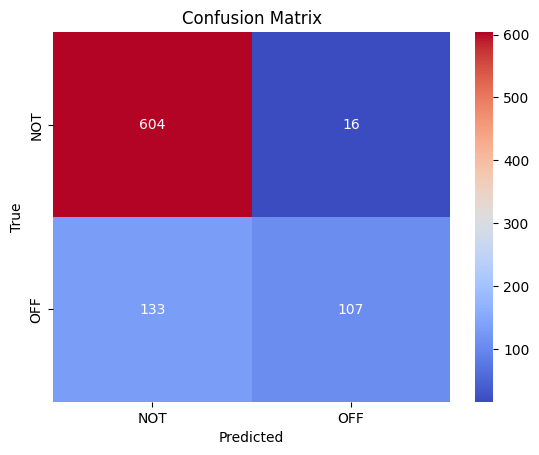


Test data F1 Score   0.8062918182087286

Test data accuracy:  0.8267441860465117
Saving model [sucessfully] output to gdrive/MyDrive/CE807/Assignment2/2200482/models/1/75/output_test.csv


In [ ]:
print('Testing using model trained on 75% data')

print('Test test_file' , test_file)
print('Test model_75_file: ', model_75_file)
print('Test MODEL_1_75_DIRECTORY: ', MODEL_1_75_DIRECTORY)

model_75_accuracy = test_method1(test_file, model_75_file, MODEL_1_75_DIRECTORY)

**[ Test the performance of a model that has been trained on 50% ]** 

Testing using model trained on 50% data
Test test_file gdrive/MyDrive/CE807/Assignment2/2200482/test.csv
Test model_50_file:  gdrive/MyDrive/CE807/Assignment2/2200482/models/1/50/best_model.pkl
Test MODEL_1_50_DIRECTORY:  gdrive/MyDrive/CE807/Assignment2/2200482/models/1/50
load_model1

Test data Performance
compute_performance

dataset accuracy:  0.827906976744186

dataset set F1 Score:  0.8102957853630159

Confusion Matrix: [[599  21]
 [127 113]]

dataset classification report:
               precision    recall  f1-score   support

         NOT       0.83      0.97      0.89       620
         OFF       0.84      0.47      0.60       240

    accuracy                           0.83       860
   macro avg       0.83      0.72      0.75       860
weighted avg       0.83      0.83      0.81       860



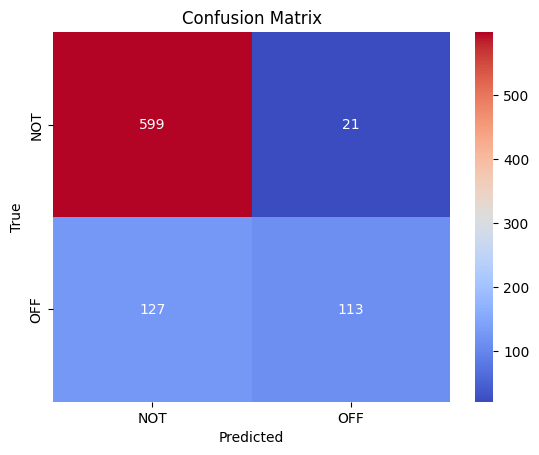


Test data F1 Score   0.8102957853630159

Test data accuracy:  0.827906976744186
Saving model [sucessfully] output to gdrive/MyDrive/CE807/Assignment2/2200482/models/1/50/output_test.csv


In [ ]:
print('Testing using model trained on 50% data')

print('Test test_file' , test_file)
print('Test model_50_file: ', model_50_file)
print('Test MODEL_1_50_DIRECTORY: ', MODEL_1_50_DIRECTORY)

model_50_accuracy = test_method1(test_file, model_50_file, MODEL_1_50_DIRECTORY)

**[ Test the performance of a model that has been trained on 25% ]** 

Testing using model trained on 25% data
Test test_file gdrive/MyDrive/CE807/Assignment2/2200482/test.csv
Test model_25_file:  gdrive/MyDrive/CE807/Assignment2/2200482/models/1/25/best_model.pkl
Test MODEL_1_25_DIRECTORY:  gdrive/MyDrive/CE807/Assignment2/2200482/models/1/25
load_model1

Test data Performance
compute_performance

dataset accuracy:  0.8023255813953488

dataset set F1 Score:  0.7781007751937983

Confusion Matrix: [[595  25]
 [145  95]]

dataset classification report:
               precision    recall  f1-score   support

         NOT       0.80      0.96      0.87       620
         OFF       0.79      0.40      0.53       240

    accuracy                           0.80       860
   macro avg       0.80      0.68      0.70       860
weighted avg       0.80      0.80      0.78       860



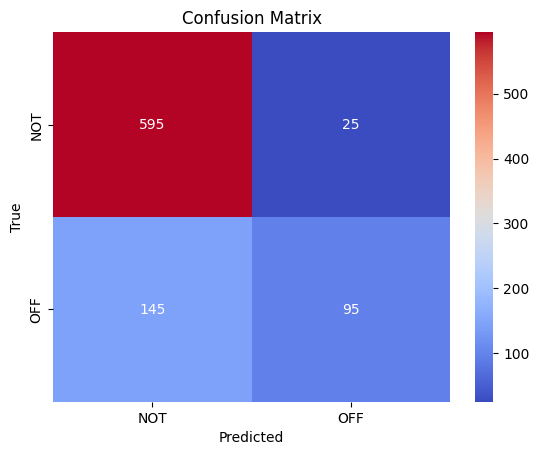


Test data F1 Score   0.7781007751937983

Test data accuracy:  0.8023255813953488
Saving model [sucessfully] output to gdrive/MyDrive/CE807/Assignment2/2200482/models/1/25/output_test.csv


In [ ]:
print('Testing using model trained on 25% data')

print('Test test_file' , test_file)
print('Test model_25_file: ', model_25_file)
print('Test MODEL_1_25_DIRECTORY: ', MODEL_1_25_DIRECTORY)

model_25_accuracy = test_method1(test_file, model_25_file, MODEL_1_25_DIRECTORY)

###Final Results

RF and SVM both state of art methods for the classifcation and our method perform well with train and valid data combination.

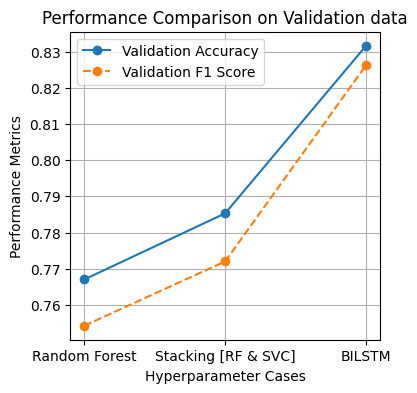

In [ ]:
import matplotlib.pyplot as plt

percentages = [100]

valid_accuracies = [0.7670, 0.7853, 0.8317]
valid_f1_scores = [0.7542, 0.7720, 0.8263]

hyperparameters = ['Random Forest', 'Stacking [RF & SVC]', 'BILSTM']

plt.figure(figsize=(4, 4))

plt.plot(hyperparameters, valid_accuracies, marker='o', label='Validation Accuracy')
plt.plot(hyperparameters, valid_f1_scores, marker='o', linestyle='--', label='Validation F1 Score')

plt.xlabel('Hyperparameter Cases')
plt.ylabel('Performance Metrics')
plt.title('Performance Comparison on Validation data')
plt.legend()
plt.grid()

plt.show()


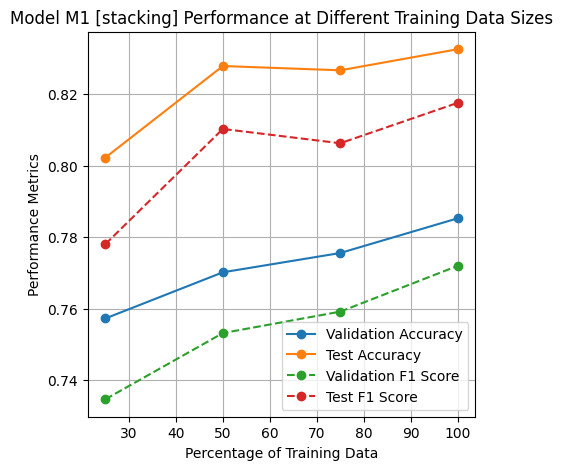

In [ ]:
import matplotlib.pyplot as plt

percentages = [25, 50, 75, 100]

#train_accuracies = [0.9009, 0.8842, 0.8781, 0.8677]
valid_accuracies = [0.7573, 0.7702, 0.7756, 0.7853]
test_accuracies = [0.8023, 0.8279, 0.8267, 0.8326]

#train_f1_scores = [0.8968, 0.8791, 0.8728, 0.8621]
valid_f1_scores = [0.7347, 0.7532, 0.7592, 0.7720]
test_f1_scores = [0.7781, 0.8103, 0.8063, 0.8176]

plt.figure(figsize=(5, 5))

#plt.plot(percentages, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(percentages, valid_accuracies, marker='o', label='Validation Accuracy')
plt.plot(percentages, test_accuracies, marker='o', label='Test Accuracy')

#plt.plot(percentages, train_f1_scores, marker='o', linestyle='--', label='Training F1 Score')
plt.plot(percentages, valid_f1_scores, marker='o', linestyle='--', label='Validation F1 Score')
plt.plot(percentages, test_f1_scores, marker='o', linestyle='--', label='Test F1 Score')

plt.xlabel('Percentage of Training Data')
plt.ylabel('Performance Metrics')
plt.title('Model M1 [stacking] Performance at Different Training Data Sizes')
plt.legend()
plt.grid()

plt.show()


## Method 1 End


# Method 2 Start

Now i am going to create pipeline for 2nd method


## Training Method 2 Code


This method using a recurrent neural network (RNN) with LSTM (Long Short-Term Memory) cells to classify text as either tweet is offensive or not.

##Read the files from Already saved directory

In [ ]:
print('Train file 100% : ', train_file)
print('Train file 75% : ', train_file_75)
print('Train file 50% : ', train_file_50)
print('Train file 25% : ', train_file_25)
print('Validation file: ', val_file)
print('Test file: ', test_file)


Train file 100% :  gdrive/MyDrive/CE807/Assignment2/2200482/train.csv
Train file 75% :  gdrive/MyDrive/CE807/Assignment2/2200482/train_75.csv
Train file 50% :  gdrive/MyDrive/CE807/Assignment2/2200482/train_50.csv
Train file 25% :  gdrive/MyDrive/CE807/Assignment2/2200482/train_25.csv
Validation file:  gdrive/MyDrive/CE807/Assignment2/2200482/valid.csv
Test file:  gdrive/MyDrive/CE807/Assignment2/2200482/test.csv


In [ ]:
train_data = pd.read_csv(train_file)
train_data_25 = pd.read_csv(train_file_25)
train_data_50 = pd.read_csv(train_file_50)
train_data_75 = pd.read_csv(train_file_75)
test_data = pd.read_csv(test_file)
valid_data = pd.read_csv(val_file)



Train the Model

In [ ]:
class ProgressBar(Callback):
    def __init__(self, epochs, val_data):
        self.epochs = epochs
        self.val_data = val_data
        self.history = []
        
    def on_train_begin(self, logs={}):
        self.pbar = tqdm(total=self.epochs)
        
    def on_epoch_end(self, epoch, logs={}):
        self.pbar.update(1)
        self.history.append(logs)
        val_loss, val_acc = self.model.evaluate(self.val_data[0], self.val_data[1], verbose=0)
        self.pbar.set_postfix({'val_loss': val_loss, 'val_acc': val_acc})
        
    def on_train_end(self, logs={}):
        self.pbar.close()

### compute the performance of our data

In [ ]:
def compute_performance2(y_true, y_pred):
    # Calculate accuracy and F1 score
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')

    print("\ndata F1 Score : ", f1)
    print("\ndata accuracy: ", accuracy)

    # Print classification report
    print("\nClassification report:\n", classification_report(y_true, y_pred))


    # Create and display confusion matrix
    conf_mat = confusion_matrix(y_true, y_pred)
    sns.heatmap(conf_mat, annot=True, fmt="d", cmap="coolwarm",
                xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

    return accuracy, f1

I have start traing with simple RNN but it not performce well

I have added the Bi LSTM [LSTM layer allows the process the input sequence both forwards and backwards, capturing both past and future information.]

In [ ]:


def train_model2(train_padded, train_data, valid_padded, valid_data):
    print("train_RNN Model ...............")
    maxlen = 200
    size_of_vocabulary = 10000
    
    # Combine train_data and valid_data
    combined_data = pd.concat([train_data, valid_data], ignore_index=True)
    combined_padded = np.concatenate([train_padded, valid_padded], axis=0)
    combined_labels = combined_data['label']

    model = Sequential()
    model.add(Embedding(size_of_vocabulary, 128, input_length=maxlen))
    model.add(Bidirectional(LSTM(64, return_sequences=True, dropout=0.2)))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.05))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print("NN based Model Shape", model.summary())
    history = model.fit(combined_padded, combined_labels, epochs=1)

    return model



In [ ]:
def save_model2(best_model,tokenizer, directory):

  # Create the directory if not available
  os.makedirs(directory, exist_ok=True)

  # Save the model to the directory
  model_file = os.path.join(directory, 'best_rnn_model.h5')
  best_model.save(model_file)

  # Save the tokenizer to the directory
  tokenizer_file = os.path.join(directory, 'tokenizer.pkl')
  with open(tokenizer_file, 'wb') as f:
      pickle.dump(tokenizer, f)

  return model_file

In [ ]:
def train_method2(train_file, val_file, model_dir):


  """
     Takes train_file, val_file and model_dir as input.
     It trained on the train_file datapoints, and validate on the val_file datapoints.
     While training and validating, it print different evaluataion metrics and losses, wheverever necessary.
     After finishing the training, it saved the best model in the model_dir.

     ADD Other arguments, if needed.

    Args:
        train_file: Train file name
        val_file: Validation file name
        model_dir: Model output Directory
            
    """
  
  
  print("\ntrain_method2 Training ..................")
  print("\ntrain_method2 Reading data ..................")
  
  train_data = pd.read_csv(train_file)
  valid_data = pd.read_csv(val_file)

  print("\ntrain_method2 Apply Preprocessing ..................")
  train_data['tweet'] = train_data['tweet'].apply(preprocess_text)
  valid_data['tweet'] = valid_data['tweet'].apply(preprocess_text)

  train_data['label'] = train_data['label'].replace({'OFF': 0, 'NOT': 1})
  valid_data['label'] = valid_data['label'].replace({'OFF': 0, 'NOT': 1})

  tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
  tokenizer.fit_on_texts(train_data['tweet'])
  train_sequences = tokenizer.texts_to_sequences(train_data['tweet'])
  valid_sequences = tokenizer.texts_to_sequences(valid_data['tweet'])

  maxlen=200
  train_padded = pad_sequences(train_sequences, maxlen=maxlen, truncating='post', padding='post')
  valid_padded = pad_sequences(valid_sequences, maxlen=maxlen, truncating='post', padding='post')


  # Train the RNN model
  model = train_model2(train_padded,train_data,valid_padded,valid_data)
  print("\nTraining Successfully [train_model2] ")
  model_file_path = save_model2(model, tokenizer, model_dir)
  print("\nSave Successfully [save_model2] ")


  train_predictions = model.predict(train_padded)
  train_predictions = (train_predictions > 0.5).astype(int)

  print("\nTraining data Performance")
  train_f1_score, train_accuracy = compute_performance2(train_data['label'], train_predictions)
  #print("\nTraining data F1 Score F1 (macro): ", train_f1_score)
  #print("\nTraining data accuracy: ", train_accuracy)

  valid_predictions = model.predict(valid_padded)
  valid_predictions = (valid_predictions > 0.5).astype(int)


  print("\nValidation data Performance")
  valid_f1_score, valid_accuracy = compute_performance2(valid_data['label'], valid_predictions)
  #print("\nTraining data F1 Score F1 (macro): ", valid_f1_score)
  #print("\nTraining data accuracy: ", valid_accuracy)


  return model_dir

Train using of 100% of data
Train file directory 100 %:  gdrive/MyDrive/CE807/Assignment2/2200482/train.csv
Validation file directory :  gdrive/MyDrive/CE807/Assignment2/2200482/valid.csv
Model 2 directory with 100% data:  gdrive/MyDrive/CE807/Assignment2/2200482/models/2/100

train_method2 Training ..................

train_method2 Reading data ..................

train_method2 Apply Preprocessing ..................
train_RNN Model ...............
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 200, 128)         98816     
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         

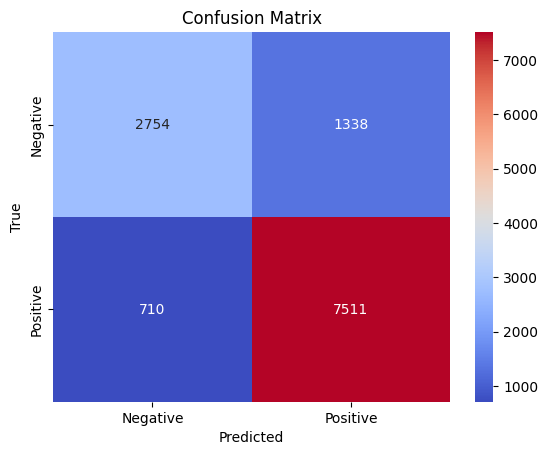

29/29 [==============================] - 0s 8ms/step

Validation data Performance

data F1 Score :  0.8243327250878493

data accuracy:  0.8284789644012945

Classification report:
               precision    recall  f1-score   support

           0       0.79      0.66      0.72       308
           1       0.84      0.91      0.88       619

    accuracy                           0.83       927
   macro avg       0.82      0.79      0.80       927
weighted avg       0.83      0.83      0.82       927



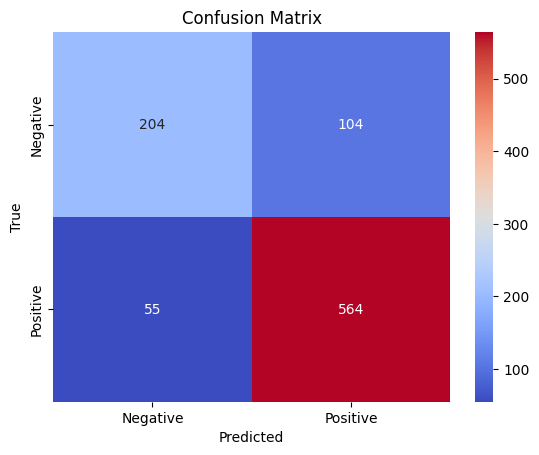

Model 2 save with 100% data:  gdrive/MyDrive/CE807/Assignment2/2200482/models/2/100


In [ ]:
print('Train using of 100% of data')
print('Train file directory 100 %: ', train_file)
print('Validation file directory : ', val_file)
print('Model 2 directory with 100% data: ', MODEL_2_100_DIRECTORY)
model_100_file = train_method2(train_file, val_file, MODEL_2_100_DIRECTORY)
print('Model 2 save with 100% data: ', model_100_file)

Train using of 75% of data
Train file directory 75 %:  gdrive/MyDrive/CE807/Assignment2/2200482/train_75.csv
Validation file directory :  gdrive/MyDrive/CE807/Assignment2/2200482/valid.csv
Model 2 directory with 75% data:  gdrive/MyDrive/CE807/Assignment2/2200482/models/2/75

train_method2 Training ..................

train_method2 Reading data ..................

train_method2 Apply Preprocessing ..................
train_RNN Model ...............
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 128)          1280000   
                                                                 
 bidirectional_1 (Bidirectio  (None, 200, 128)         98816     
 nal)                                                            
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)              0        

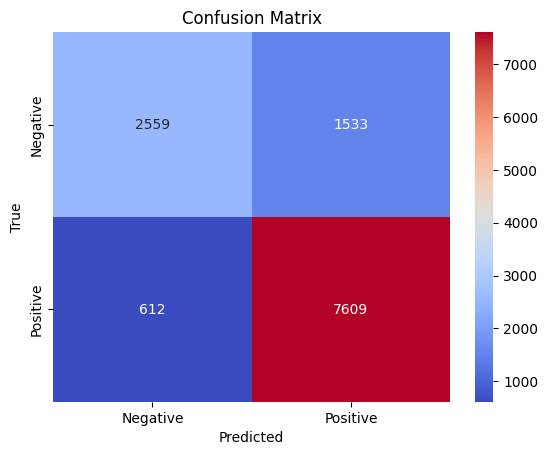

29/29 [==============================] - 0s 11ms/step

Validation data Performance

data F1 Score :  0.8025336078603503

data accuracy:  0.8101402373247033

Classification report:
               precision    recall  f1-score   support

           0       0.78      0.59      0.68       308
           1       0.82      0.92      0.87       619

    accuracy                           0.81       927
   macro avg       0.80      0.76      0.77       927
weighted avg       0.81      0.81      0.80       927



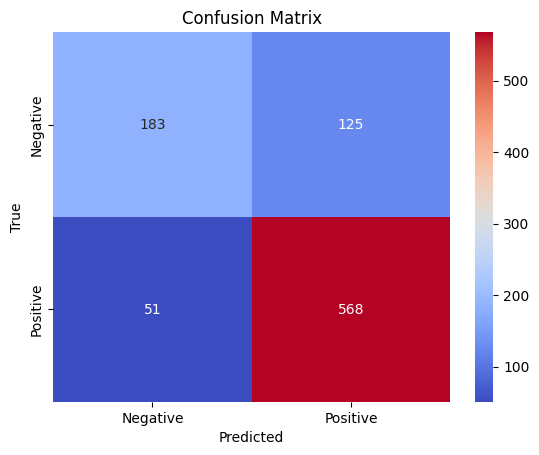

Model 2 save with 75% data:  gdrive/MyDrive/CE807/Assignment2/2200482/models/2/75


In [ ]:
print('Train using of 75% of data')
print('Train file directory 75 %: ', train_file_75)
print('Validation file directory : ', val_file)
print('Model 2 directory with 75% data: ', MODEL_2_75_DIRECTORY)
model_75_file = train_method2(train_file, val_file, MODEL_2_75_DIRECTORY)
print('Model 2 save with 75% data: ', model_75_file)

Train using of 50% of data
Train file directory 50 %:  gdrive/MyDrive/CE807/Assignment2/2200482/train_50.csv
Validation file directory :  gdrive/MyDrive/CE807/Assignment2/2200482/valid.csv
Model 2 directory with 50% data:  gdrive/MyDrive/CE807/Assignment2/2200482/models/2/50

train_method2 Training ..................

train_method2 Reading data ..................

train_method2 Apply Preprocessing ..................
train_RNN Model ...............
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 128)          1280000   
                                                                 
 bidirectional_2 (Bidirectio  (None, 200, 128)         98816     
 nal)                                                            
                                                                 
 global_max_pooling1d_2 (Glo  (None, 128)              0        

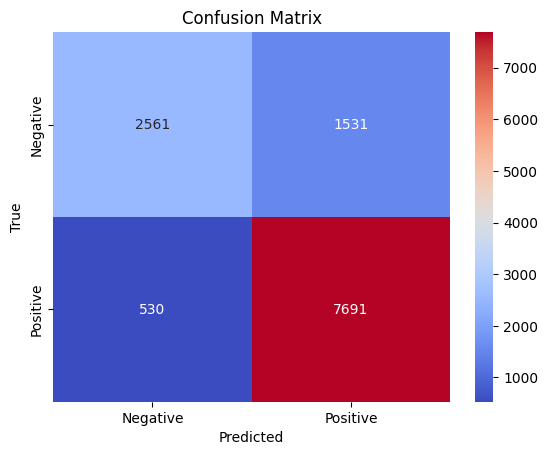

29/29 [==============================] - 0s 8ms/step

Validation data Performance

data F1 Score :  0.8185066530196743

data accuracy:  0.8263214670981661

Classification report:
               precision    recall  f1-score   support

           0       0.82      0.61      0.70       308
           1       0.83      0.94      0.88       619

    accuracy                           0.83       927
   macro avg       0.83      0.77      0.79       927
weighted avg       0.83      0.83      0.82       927



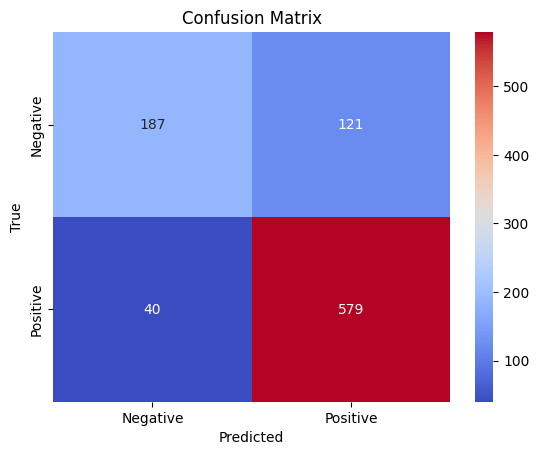

Model 2 save with 50% data:  gdrive/MyDrive/CE807/Assignment2/2200482/models/2/50


In [ ]:
print('Train using of 50% of data')
print('Train file directory 50 %: ', train_file_50)
print('Validation file directory : ', val_file)
print('Model 2 directory with 50% data: ', MODEL_2_50_DIRECTORY)
model_50_file = train_method2(train_file, val_file, MODEL_2_50_DIRECTORY)
print('Model 2 save with 50% data: ', model_50_file)

Train using of 25% of data
Train file directory 25 %:  gdrive/MyDrive/CE807/Assignment2/2200482/train_25.csv
Validation file directory :  gdrive/MyDrive/CE807/Assignment2/2200482/valid.csv
Model 2 directory with 25% data:  gdrive/MyDrive/CE807/Assignment2/2200482/models/2/25

train_method2 Training ..................

train_method2 Reading data ..................

train_method2 Apply Preprocessing ..................
train_RNN Model ...............
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 128)          1280000   
                                                                 
 bidirectional_3 (Bidirectio  (None, 200, 128)         98816     
 nal)                                                            
                                                                 
 global_max_pooling1d_3 (Glo  (None, 128)              0        

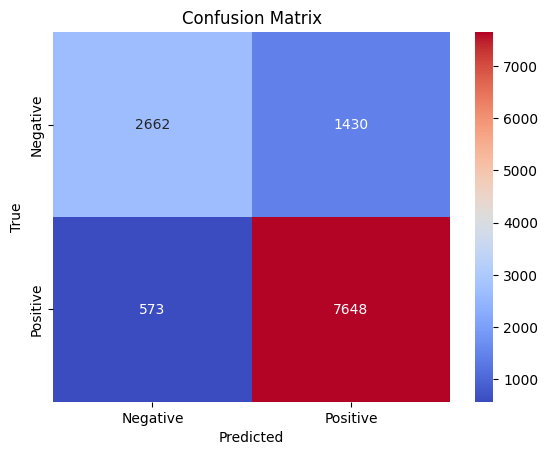

29/29 [==============================] - 0s 11ms/step

Validation data Performance

data F1 Score :  0.8254307572023791

data accuracy:  0.8317152103559871

Classification report:
               precision    recall  f1-score   support

           0       0.82      0.63      0.71       308
           1       0.84      0.93      0.88       619

    accuracy                           0.83       927
   macro avg       0.83      0.78      0.80       927
weighted avg       0.83      0.83      0.83       927



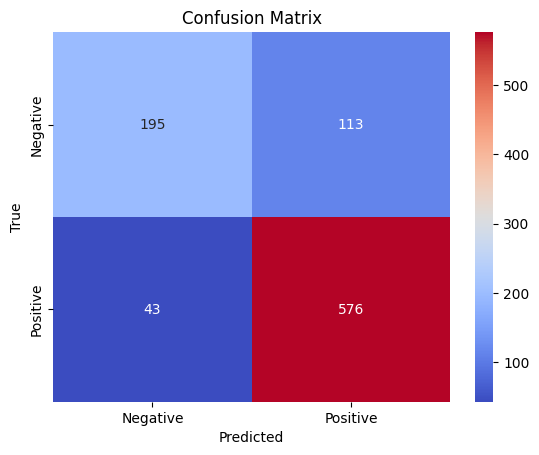

Model 2 save with 25% data:  gdrive/MyDrive/CE807/Assignment2/2200482/models/2/25


In [ ]:
print('Train using of 25% of data')
print('Train file directory 25 %: ', train_file_25)
print('Validation file directory : ', val_file)
print('Model 2 directory with 25% data: ', MODEL_2_25_DIRECTORY)
model_25_file = train_method2(train_file, val_file, MODEL_2_25_DIRECTORY)
print('Model 2 save with 25% data: ', model_25_file)

## Testing Method 2 Code
Your test code should be a stand alone code that must take `test_file`, `model_file` and `output_dir` as input. You could have other things as also input, but these three are must. You would load both files, and generate output based on inputs. Then you will `print` / `display`/ `plot` all performance metrics, and save the output file in the `output_dir`  

In [ ]:

from tensorflow.keras.models import load_model

def load_model2(directory):
    # Load the model from the directory
    model_file = os.path.join(directory, 'best_rnn_model.h5')
    loaded_model = load_model(model_file)

    # Load the tokenizer from the directory
    tokenizer_file = os.path.join(directory, 'tokenizer.pkl')
    with open(tokenizer_file, 'rb') as f:
        loaded_tokenizer = pickle.load(f)

    return loaded_model, loaded_tokenizer

In [ ]:
def test_method2(test_file, model_file, output_dir):
    """
    Takes test_file, model_file, and output_dir as input.
    It loads the model and tests the examples in the test_file.
    It prints different evaluation metrics and saves the output in the output directory.

    Args:
        test_file: test file name
        model_file: model file name
        output_dir: Output Directory
    """

    test_data = pd.read_csv(test_file)

    test_data_out = test_data
    test_data['tweet'] = test_data['tweet'].apply(preprocess_text)

    model, tokenizer = load_model2(output_dir)
    maxlen=200
    test_sequences = tokenizer.texts_to_sequences(test_data['tweet'])
    test_padded = pad_sequences(test_sequences, maxlen=maxlen, truncating='post', padding='post')

    predictions = model.predict(test_padded)
    predictions = (predictions > 0.5).astype(int)


    test_data['label'] = test_data['label'].replace({'OFF': 0, 'NOT': 1})

    print("\nTest data Performance")
    test_f1_score, test_accuracy = compute_performance2(test_data['label'], predictions)
    #print("\nTest data F1 Score  ", test_f1_score)
    #print("\nTest data accuracy: ", test_accuracy)

    # Add the model's output as a new column to the test data
    test_data_out['out_label'] = predictions

    # Convert the values to strings
    test_data_out['out_label'] = test_data_out['out_label'].astype(str)
    test_data_out['label'] = test_data_out['label'].astype(str)

    # Replace the '0' values with 'OFF' and the '1' values with 'NOT'
    test_data_out['out_label'] = test_data_out['out_label'].replace({'0': 'OFF', '1': 'NOT'})
    test_data_out['label'] = test_data_out['label'].replace({'0': 'OFF', '1': 'NOT'})



    # Save the test data with the new predictions column in the required format
    out_file = os.path.join(output_dir, 'output_test.csv')
    print('Saving model [sucessfully] output to', out_file)
    test_data_out.to_csv(out_file, index=False)

    return test_accuracy


**[ Test the performance of a model that has been trained on 100% ]** 

Testing using model trained on 100% data
Test test_file gdrive/MyDrive/CE807/Assignment2/2200482/test.csv
Test model_100_file:  gdrive/MyDrive/CE807/Assignment2/2200482/models/2/100
Test MODEL_2_100_DIRECTORY:  gdrive/MyDrive/CE807/Assignment2/2200482/models/2/100
27/27 [==============================] - 2s 16ms/step

Test data Performance

data F1 Score :  0.8036193148250055

data accuracy:  0.8116279069767441

Classification report:
               precision    recall  f1-score   support

           0       0.71      0.55      0.62       240
           1       0.84      0.91      0.87       620

    accuracy                           0.81       860
   macro avg       0.77      0.73      0.75       860
weighted avg       0.80      0.81      0.80       860



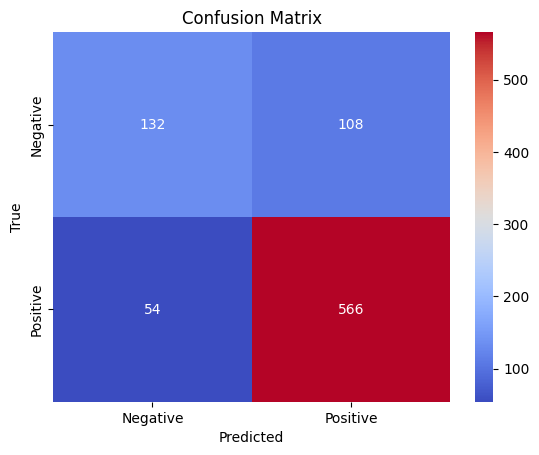

Saving model [sucessfully] output to gdrive/MyDrive/CE807/Assignment2/2200482/models/2/100/output_test.csv


0.8036193148250055

In [ ]:
print('Testing using model trained on 100% data')

print('Test test_file' , test_file)
print('Test model_100_file: ', model_100_file)
print('Test MODEL_2_100_DIRECTORY: ', MODEL_2_100_DIRECTORY)

test_method2(test_file, model_100_file, MODEL_2_100_DIRECTORY)

**[ Test the performance of a model that has been trained on 75% ]** 

Testing using model trained on 75% data
Test test_file gdrive/MyDrive/CE807/Assignment2/2200482/test.csv
Test model_75_file:  gdrive/MyDrive/CE807/Assignment2/2200482/models/2/75
Test MODEL_2_75_DIRECTORY:  gdrive/MyDrive/CE807/Assignment2/2200482/models/2/75
27/27 [==============================] - 1s 11ms/step

Test data Performance

data F1 Score :  0.814597434364327

data accuracy:  0.8255813953488372

Classification report:
               precision    recall  f1-score   support

           0       0.77      0.53      0.63       240
           1       0.84      0.94      0.89       620

    accuracy                           0.83       860
   macro avg       0.80      0.74      0.76       860
weighted avg       0.82      0.83      0.81       860



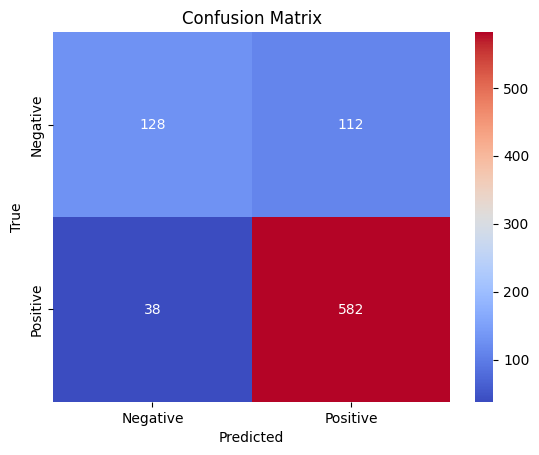

Saving model [sucessfully] output to gdrive/MyDrive/CE807/Assignment2/2200482/models/2/75/output_test.csv


0.814597434364327

In [ ]:
print('Testing using model trained on 75% data')

print('Test test_file' , test_file)
print('Test model_75_file: ', model_75_file)
print('Test MODEL_2_75_DIRECTORY: ', MODEL_2_75_DIRECTORY)

test_method2(test_file, model_75_file, MODEL_2_75_DIRECTORY)

**[ Test the performance of a model that has been trained on 50% ]** 

Testing using model trained on 50% data
Test test_file gdrive/MyDrive/CE807/Assignment2/2200482/test.csv
Test model_50_file:  gdrive/MyDrive/CE807/Assignment2/2200482/models/2/50
Test MODEL_2_50_DIRECTORY:  gdrive/MyDrive/CE807/Assignment2/2200482/models/2/50
27/27 [==============================] - 1s 11ms/step

Test data Performance

data F1 Score :  0.8132464641094551

data accuracy:  0.8267441860465117

Classification report:
               precision    recall  f1-score   support

           0       0.80      0.51      0.62       240
           1       0.83      0.95      0.89       620

    accuracy                           0.83       860
   macro avg       0.82      0.73      0.75       860
weighted avg       0.82      0.83      0.81       860



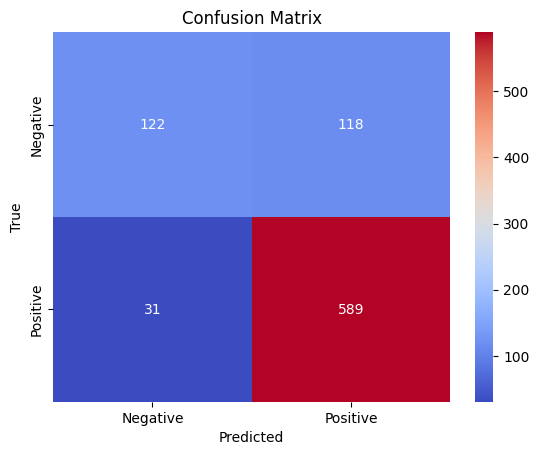

Saving model [sucessfully] output to gdrive/MyDrive/CE807/Assignment2/2200482/models/2/50/output_test.csv


0.8132464641094551

In [ ]:
print('Testing using model trained on 50% data')

print('Test test_file' , test_file)
print('Test model_50_file: ', model_50_file)
print('Test MODEL_2_50_DIRECTORY: ', MODEL_2_50_DIRECTORY)

test_method2(test_file, model_50_file, MODEL_2_50_DIRECTORY)

**[ Test the performance of a model that has been trained on 25% ]** 

Testing using model trained on 25% data
Test test_file gdrive/MyDrive/CE807/Assignment2/2200482/test.csv
Test model_25_file:  gdrive/MyDrive/CE807/Assignment2/2200482/models/2/25
Test MODEL_2_25_DIRECTORY:  gdrive/MyDrive/CE807/Assignment2/2200482/models/2/25
27/27 [==============================] - 1s 11ms/step

Test data Performance

data F1 Score :  0.8174443628841215

data accuracy:  0.827906976744186

Classification report:
               precision    recall  f1-score   support

           0       0.77      0.54      0.64       240
           1       0.84      0.94      0.89       620

    accuracy                           0.83       860
   macro avg       0.81      0.74      0.76       860
weighted avg       0.82      0.83      0.82       860



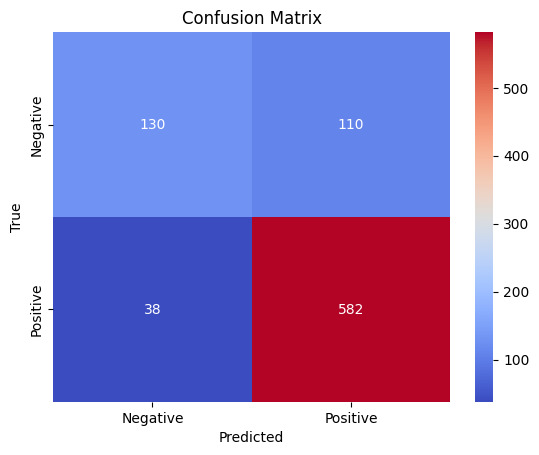

Saving model [sucessfully] output to gdrive/MyDrive/CE807/Assignment2/2200482/models/2/25/output_test.csv


0.8174443628841215

In [ ]:
print('Testing using model trained on 25% data')

print('Test test_file' , test_file)
print('Test model_25_file: ', model_25_file)
print('Test MODEL_2_25_DIRECTORY: ', MODEL_2_25_DIRECTORY)

test_method2(test_file, model_25_file, MODEL_2_25_DIRECTORY)

## Final Results

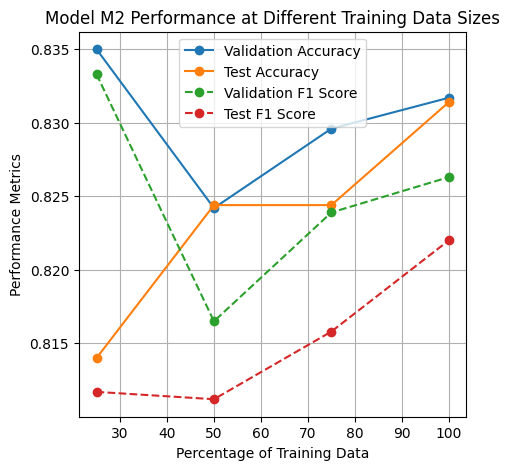

In [ ]:
import matplotlib.pyplot as plt

percentages = [25, 50, 75, 100]

#train_accuracies = [0.8380, 0.8237, 0.8333, 0.8370]
valid_accuracies = [0.8350, 0.8242, 0.8296, 0.8317]
test_accuracies = [0.8140, 0.8244, 0.8244, 0.8314]

#train_f1_scores = [0.8369, 0.8155, 0.8269, 0.8315]
valid_f1_scores = [0.8333, 0.8165, 0.8239, 0.8263]
test_f1_scores = [0.8117, 0.8112, 0.8158, 0.8220]

plt.figure(figsize=(5, 5))

#plt.plot(percentages, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(percentages, valid_accuracies, marker='o', label='Validation Accuracy')
plt.plot(percentages, test_accuracies, marker='o', label='Test Accuracy')

#plt.plot(percentages, train_f1_scores, marker='o', linestyle='--', label='Training F1 Score')
plt.plot(percentages, valid_f1_scores, marker='o', linestyle='--', label='Validation F1 Score')
plt.plot(percentages, test_f1_scores, marker='o', linestyle='--', label='Test F1 Score')

plt.xlabel('Percentage of Training Data')
plt.ylabel('Performance Metrics')
plt.title('Model M2 Performance at Different Training Data Sizes')
plt.legend()
plt.grid()

plt.show()


## Method 2 End


# Acknowledgment

I'd like to acknowledge and thank the authors of the following resources, which were helpful in guiding the development of the models and understanding various aspects of text classification, preprocessing, and deep learning techniques:

1) Multi-Class Classification with LSTM by Ngyptr:
(https://www.kaggle.com/code/ngyptr/multi-class-classification-with-lstm/notebook)

2) Sentiment Analysis with NLTK, ML, LSTM by Nagy Péter: 
(https://github.com/nagypeterjob/Sentiment-Analysis-NLTK-ML-LSTM/blob/master/lstm.ipynb)

3) Efficient multi-lingual sentiment classification using Distributed Stochastic Neighbor Embedding and deep Recurrent Neural Networks by Peter Wittek and Shioulin Sam: This PeerJ article explores the use of deep RNNs and Distributed Stochastic Neighbor Embedding for sentiment classification in multiple languages.
(https://peerj.com/articles/cs-559/)

4) IMDB Review Preprocessing & BiLSTM with 88% Accuracy by Omer Mero: 
(https://www.kaggle.com/code/omermo/imdb-review-preprocessing-blstm-88-accuracy)

5) Intro to Deep Learning and Text Sentiment Analysis by Maurício Figueiredo:
(https://www.kaggle.com/code/mauriciofigueiredo/intro-to-dl-and-text-sentiment-analysis)

6) Sentiment Analysis IMDB - Gensim by Himanshu Sirsat: 
(https://www.kaggle.com/code/himanshusirsat/sentiment-analysis-imdb-gensim)

7)Ensemble Stacking for Machine Learning and Deep Learning
 https://www.analyticsvidhya.com/blog/2021/08/ensemble-stacking-for-machine-learning-and-deep-learning/